In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat
ex6data1 = loadmat('./data/ex6data1.mat')
ex6data2 = loadmat('./data/ex6data2.mat')
ex6data3 = loadmat('./data/ex6data3.mat')

In [4]:
# 先来查看第一组数据，两个特征，具有线性的决策边界
X = ex6data1['X']
y = ex6data1['y']
X.shape, y.shape # 51个样本

((51, 2), (51, 1))

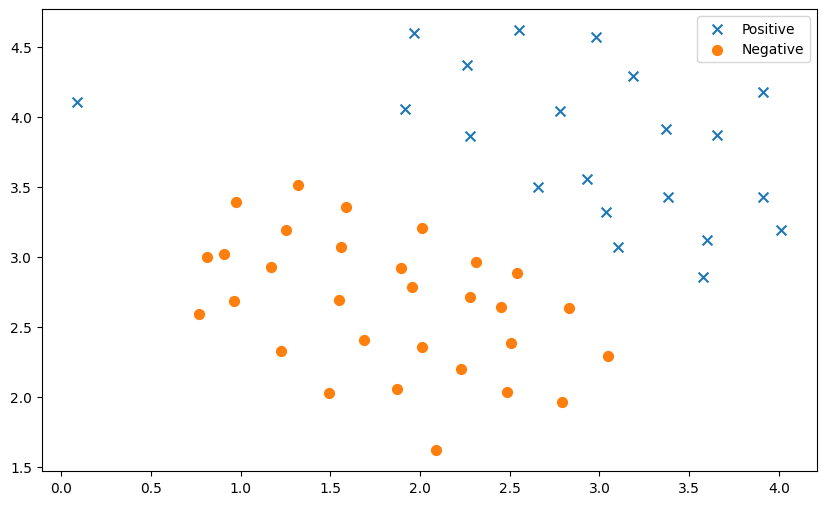

In [12]:
dtLinear = pd.DataFrame()
dtLinear['x1'] = X[:, 0]
dtLinear['x2'] = X[:, 1]
dtLinear['y'] = y
dtLpos = dtLinear[dtLinear['y'] == 1]
dtLneg = dtLinear[dtLinear['y'] == 0]
# 描点
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(dtLpos['x1'], dtLpos['x2'], s=50, marker='x', label="Positive")
ax.scatter(dtLneg['x1'], dtLneg['x2'], s=50, marker='o', label="Negative")
ax.legend()
plt.show()

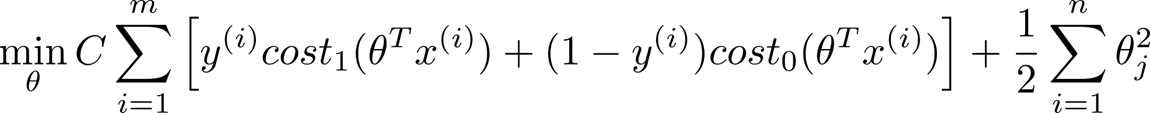

In [29]:
# 使用skit-learn的svm学习包
from sklearn import svm
# C控制着hinge_loss的比重, 增大C意味着决策边界将尽可能少的误分类, 
# 这样可能造成"过拟合"-"高方差", 减小C则意味着对于异常数据点不那么敏感
svc = svm.LinearSVC(C=1, loss="hinge")
# svc = svm.LinearSVC(C=200, loss="hinge")
svc

LinearSVC(C=1, loss='hinge')

In [30]:
# 数据拟合
svc.fit(dtLinear[['x1', 'x2']], dtLinear['y'])
# 参数获取
a, b = svc.coef_[0]
c = svc.intercept_[0]
# 决策边界 a*x1+b*x2+c=0
a, b, c

C:\Users\mrrai\.conda\envs\MachineLearning\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


(0.5914373712322764, 0.8163929378800494, -4.11531304422498)

In [31]:
svc.score(dtLinear[['x1', 'x2']], dtLinear['y'])

0.9803921568627451

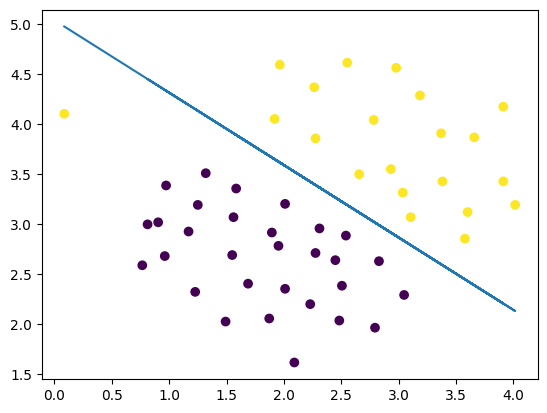

In [32]:
# 作图
plt.scatter(dtLinear['x1'], dtLinear['x2'], c=dtLinear['y'])
plt.plot(dtLinear['x1'], -(a*dtLinear['x1']+c)/b)
plt.show()

### 非线性的决策数据
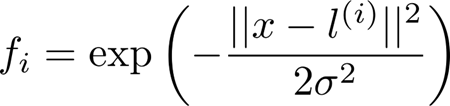

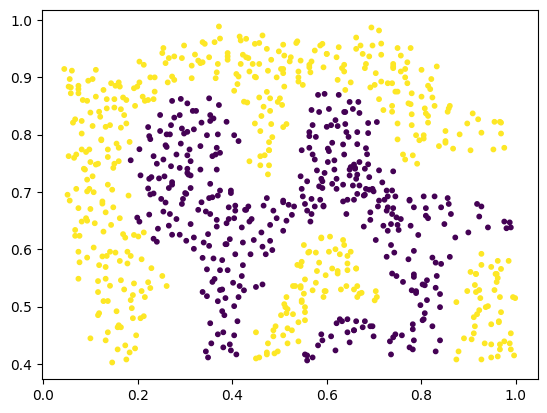

In [39]:
NlX = ex6data2['X']
Nly = ex6data2['y']
plt.scatter(NlX[:, 0], NlX[:, 1], c=Nly, s=10)
plt.show()

In [37]:
# 先写个高斯核函数
def guassian(x1, x2, sigma):
    dif = x1-x2
    return np.exp((-np.sum(np.multiply(dif, dif)))/(2*sigma*sigma))
# 测试数据是否计算正确
tst_x1 = np.array([1, 2, 1])
tst_x2 = np.array([0, 4, -1])
sigma = 2
guassian(tst_x1, tst_x2, sigma)

0.32465246735834974

对于该数据集，我们将使用内置的RBF内核构建支持向量机分类器，并检查其对训练数据的准确性。 为了可视化决策边界，这一次我们将根据实例具有负类标签的预测概率来对点做阴影。 从结果可以看出，它们大部分是正确的。(注意，高斯核又称RBF内核)  

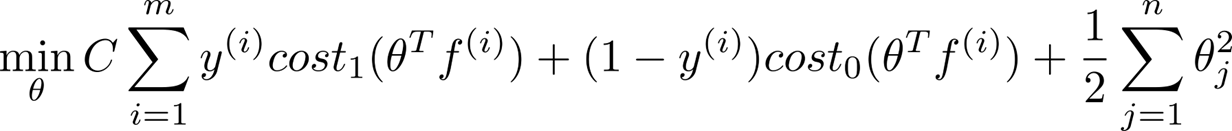
(注意，正则化项的n实际等于m)

In [47]:
svc = svm.SVC(kernel='rbf', C=30, gamma=10, probability=True)
# 如上的参数解释
# kernel: 核函数, 'rbf'即高斯核函数
# C: 反正则化系数, C越小意味着欠拟合的可能性越大
# gamma: 在kernel='rbf'时, gamma也即sigma, sigma越大意味着核函数越平缓, 欠拟合的可能性越大
# probability: 方程式无关, 函数相关, 默认为False, 
# 设置为True时内部会使用5-fold crossify validation
svc

SVC(C=30, gamma=10, probability=True)

In [48]:
svc.fit(NlX, Nly)
svc.score(NlX, Nly)

C:\Users\mrrai\.conda\envs\MachineLearning\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9594438006952491

### 参数寻找
第三个数据集包含X, y以及Xval, yval, 要求尝试所有不同的参数值，找出其中的最佳组合

In [50]:
X = ex6data3['X']
y = ex6data3['y']
Xval = ex6data3['Xval']
yval = ex6data3['yval']
X.shape, Xval.shape

((211, 2), (200, 2))

In [52]:
argl = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
C_b = argl[0]
sigma_b = argl[0]
score_b = 0
for C in argl:
    for sigma in argl:
        svc = svm.SVC(kernel='rbf', C=C, gamma=sigma, probability=True)
        svc.fit(X, y.ravel())
        score = svc.score(Xval, yval)
        if score > score_b:
            C_b = C
            sigma_b = sigma
            score_b = score
C_b, sigma_b, score_b

(3, 30, 0.965)

现在，我们将进行第二部分的练习。 在这一部分中，我们的目标是使用SVM来构建垃圾邮件过滤器。 在练习文本中，有一个任务涉及一些文本预处理，以获得适合SVM处理的格式的数据。 然而，这个任务很简单（将字词映射到为练习提供的字典中的ID），而其余的预处理步骤（如HTML删除，词干，标准化等）已经完成。 我将跳过机器学习任务，而不是重现这些预处理步骤，其中包括从预处理过的训练集构建分类器，以及将垃圾邮件和非垃圾邮件转换为单词出现次数的向量的测试数据集。

In [60]:
spam_train=loadmat("./data/spamTrain.mat")
spam_test=loadmat("./data/spamTest.mat")
X_train = spam_train['X']
y_train = spam_train['y']
X_test = spam_test['Xtest']
y_test = spam_test['ytest']
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4000, 1899), (4000, 1), (1000, 1899), (1000, 1))

这表明一共有4000个样例, 每个样例1899个特征, 每个文档已经转换为一个向量，其中1,899个维对应于词汇表中的1,899个单词。 它们的值为二进制，表示文档中是否存在单词。 在这一点上，训练评估是用一个分类器拟合测试数据的问题。


In [62]:
svc = svm.SVC()
svc.fit(X_train, y_train.ravel())
svc.score(X_test, y_test.ravel())

0.987

In [70]:
vocab = pd.read_csv("./data/vocab.txt", 
                    header=None, 
                    names=['Index', "Word"], 
                    sep='\t'
                   )
vocab = vocab['Word'].to_list()
len(vocab)

1899

In [71]:
"date" in vocab

True

In [ ]:
# 似乎没什么其他的事可做了
# 这些预处理的步骤不属于ML, 可以选择稍后做
# svm已经有现成的库了，参数调试也不操心